In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
#  Loading Data

path = "/content/drive/MyDrive/DataSource/data_retail2.xlsx"
load_data = pd.read_excel(path)

In [5]:
# Membuat data frame

df=pd.DataFrame(load_data)
df.head()

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
0,536365,2020-12-01 08:26:00,13,SAMARINDA,10001,8992753282401,85123A,123 BENDERA COKLAT 300G,SUSU,6,...,17850.0,DUA PUTRI SLAMET RIYADI,JL. SLAMET RIYADI,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
1,536365,2020-12-01 08:26:00,13,SAMARINDA,20020,8999909192034,71053,2.3.4 FILTER,ROKOK,6,...,17850.0,SANURI,JL. M. SAID,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
2,536365,2020-12-01 08:26:00,19,YOGYAKARTA,20021,8999909007147,84406B,234 KERETEK,ROKOK,8,...,17850.0,EMI MBAK,PS. TALUN NO.63,MAGELANG,JAWA TENGAH,INDONESIA,32,Toko Kelontong,190105,PT. KTRI DISTRIBUSI
3,536365,2020-12-01 08:26:00,13,SAMARINDA,20018,8999909172234,84029G,234 KERETEK 12,ROKOK,6,...,17850.0,RISKA CELL ADAM MALIK,JL. ADAM MALIK,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
4,536365,2020-12-01 08:26:00,19,YOGYAKARTA,20019,8999909005860,84029E,234 KERETEK 16,ROKOK,6,...,17850.0,ABADI MART,JL.GROWONG - PUCUNG REJO MUNTILAN.,MAGELANG,JAWA TENGAH,INDONESIA,42,Mini Market,190105,PT. KTRI DISTRIBUSI


# Bussines Understanding

Toko yg menjual perabot rumah tangga, ingin mendapat insight penjualan yg mungkin bisa diterapkan:

1. product yg dijual secara bersamaan
2. Beli x mendapatkan diskon produk y

- Problem : Asosiasi
- Algoritma: Apriori(unsupervised)

# Data Understanding

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   InvoiceNo            541909 non-null  object        
 1   InvoiceDate          541909 non-null  datetime64[ns]
 2   BRANCH_SPLR          541909 non-null  int64         
 3   BRANCHNAME_SPLR      541909 non-null  object        
 4   warehouseProductsID  541909 non-null  object        
 5   BARCODEID            541909 non-null  int64         
 6   StockCode            541909 non-null  object        
 7   PRODUCT              541909 non-null  object        
 8   PRODUCT_CATEGORY     541909 non-null  object        
 9   Quantity             541909 non-null  int64         
 10  UnitPrice            541909 non-null  float64       
 11  UnitPriceRupiah      541909 non-null  float64       
 12  oldCUSTID            541909 non-null  object        
 13  CustomerID    

In [7]:
df.isnull().sum()

InvoiceNo                   0
InvoiceDate                 0
BRANCH_SPLR                 0
BRANCHNAME_SPLR             0
warehouseProductsID         0
BARCODEID                   0
StockCode                   0
PRODUCT                     0
PRODUCT_CATEGORY            0
Quantity                    0
UnitPrice                   0
UnitPriceRupiah             0
oldCUSTID                   0
CustomerID             135080
CUSTNAME                    0
ADDRESS                   172
KOTA                    16672
PROVINSI                14840
NEGARA                      0
CHANNELID_SPLR              0
CHANNELNAME_SPLR            0
SUBDISTID                   0
SUBDIST_NAME                0
dtype: int64

In [8]:
!pip install mlxtend

In [9]:
df['PROVINSI'].value_counts()

JAWA TENGAH            138644
JAWA TIMUR              95089
JAWA BARAT              83588
KAL-SEL                 21452
KEPULAUAN RIAU          18400
BALI                    17508
BANTEN                  15232
KALIMANTAN TIMUR        13860
DI YOGYAKARTA           13496
Jawa Tengah             13176
NUSA TENGGARA BARAT      8576
Jawa timur               7528
JAWA TENGAH              6636
SULAWESI SELATAN         6428
Kalimantan Timur         6424
LAMPUNG                  6280
DIY                      5740
Sumatera Selatan         5592
RIAU                     5476
KALTENG                  5244
SUMATERA UTARA           5200
SULAWESI UTARA           4648
SUMATERA BARAT           4256
SUMATERA SELATAN         4064
KALIMANTAN SELATAN       3532
KALIMANTAN TENGAH        3432
JAWATENGAH               2956
SULAWESI TENGGARA        2076
SULAWESI TENGAH          1480
KALIMANTAN BARAT          480
KAL-BAR                   320
JAMBI                     148
BANGKA BELITUNG            64
Jawa Barat

In [10]:
df_jateng1=df[(df['PROVINSI']== 'JAWA TENGAH')]
df_jateng2=df[(df['PROVINSI']== 'Jawa Tengah')]
df_jateng3=df[(df['PROVINSI']== 'JAWATENGAH')]
df_jateng4=df[(df['PROVINSI']== 'JAWA TENGAH ')]

df_jateng=pd.concat([df_jateng1,df_jateng2,df_jateng3,df_jateng4], sort=True, axis=0)
df_jateng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161412 entries, 14 to 275606
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ADDRESS              161412 non-null  object        
 1   BARCODEID            161412 non-null  int64         
 2   BRANCHNAME_SPLR      161412 non-null  object        
 3   BRANCH_SPLR          161412 non-null  int64         
 4   CHANNELID_SPLR       161412 non-null  int64         
 5   CHANNELNAME_SPLR     161412 non-null  object        
 6   CUSTNAME             161412 non-null  object        
 7   CustomerID           125579 non-null  float64       
 8   InvoiceDate          161412 non-null  datetime64[ns]
 9   InvoiceNo            161412 non-null  object        
 10  KOTA                 147668 non-null  object        
 11  NEGARA               161412 non-null  object        
 12  PRODUCT              161412 non-null  object        
 13  PRODUCT_CATEG

In [11]:
df_jateng['PROVINSI']=df_jateng['PROVINSI'].replace('JAWA TENGAH', 'Jawa Tengah')
df_jateng['PROVINSI']=df_jateng['PROVINSI'].replace('JAWATENGAH', 'Jawa Tengah')
df_jateng['PROVINSI']=df_jateng['PROVINSI'].replace('JAWA TENGAH ', 'Jawa Tengah')
df_jateng['PROVINSI']=df_jateng['PROVINSI'].replace('Jawa Tengah', 'Jawa Tengah')

In [12]:
df_jateng['PROVINSI'].value_counts()

Jawa Tengah    161412
Name: PROVINSI, dtype: int64

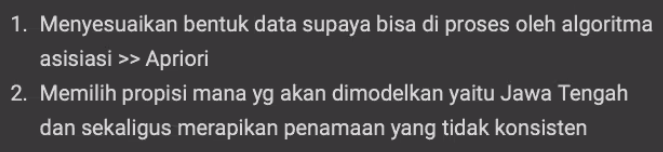

In [13]:
# Mengubah invoice date ke bentuk date time
df_jateng['InvoiceDate']=pd.to_datetime(df_jateng['InvoiceDate'])

In [14]:
df_jateng.head()

,ADDRESS,BARCODEID,BRANCHNAME_SPLR,BRANCH_SPLR,CHANNELID_SPLR,CHANNELNAME_SPLR,CUSTNAME,CustomerID,InvoiceDate,InvoiceNo,...,PRODUCT_CATEGORY,PROVINSI,Quantity,SUBDISTID,SUBDIST_NAME,StockCode,UnitPrice,UnitPriceRupiah,oldCUSTID,warehouseProductsID
14,NEPAK BULUREJO (DPN SMKN 1),9555021502350,YOGYAKARTA,19,32,Toko Kelontong,IMAM,13047.0,2020-12-01 08:34:00,536367,...,MINUMAN,Jawa Tengah,6,190105,PT. KTRI DISTRIBUSI,84969,4.25,60775.0,1922038,A2375
16,JL RAYA KANDANGAN JLN.,8992761111212,YOGYAKARTA,19,32,Toko Kelontong,A&W MART,13047.0,2020-12-01 08:34:00,536367,...,MINUMAN,Jawa Tengah,2,190105,PT. KTRI DISTRIBUSI,22622,9.95,142285.0,1922807,A2568
21,JL. RAYA TUNTANG - MBERAN,8850305310340,SEMARANG,6,32,Toko Kelontong,ANDALAN (MOTORIS),13047.0,2020-12-01 08:34:00,536368,...,MAKANAN KALENG,Jawa Tengah,6,60315,PT. KELUARGA SEJAHTRA,22960,4.25,60775.0,1630992,A2416
22,AMBARAWA,8850305310258,SEMARANG,6,32,Toko Kelontong,AMBARWATI (MOTORIS),13047.0,2020-12-01 08:34:00,536368,...,MINUMAN,Jawa Tengah,3,60315,PT. KELUARGA SEJAHTRA,22913,4.95,70785.0,1631972,A2432
29,TANJUNG,8992388121243,PURWOKERTO,36,32,Toko Kelontong,SALMA SLM0401,12583.0,2020-12-01 08:45:00,536370,...,MINUMAN,Jawa Tengah,12,320302,CV. CITRA BERUSAHA,21724,0.85,12155.0,3217503,A2678


In [15]:
# Memulai proses tranformasi dari data transaksional ke
# Tahap 1 adalah mengubah hal yg menjadi prioritas pada keranjang belanja


df_jateng['PRODUCT']=df_jateng['PRODUCT'].str.strip()
df_jateng['PRODUCT_CATEGORY']=df_jateng['PRODUCT_CATEGORY'].str.strip()

In [16]:
df_jateng.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df_jateng['InvoiceNo']=df_jateng['InvoiceNo'].astype('str')
df_jateng=df_jateng[~(df_jateng['InvoiceNo'].str[0]=='C')]

In [17]:
df_jateng

,ADDRESS,BARCODEID,BRANCHNAME_SPLR,BRANCH_SPLR,CHANNELID_SPLR,CHANNELNAME_SPLR,CUSTNAME,CustomerID,InvoiceDate,InvoiceNo,...,PRODUCT_CATEGORY,PROVINSI,Quantity,SUBDISTID,SUBDIST_NAME,StockCode,UnitPrice,UnitPriceRupiah,oldCUSTID,warehouseProductsID
14,NEPAK BULUREJO (DPN SMKN 1),9555021502350,YOGYAKARTA,19,32,Toko Kelontong,IMAM,13047.0,2020-12-01 08:34:00,536367,...,MINUMAN,Jawa Tengah,6,190105,PT. KTRI DISTRIBUSI,84969,4.25,60775.0,1922038,A2375
16,JL RAYA KANDANGAN JLN.,8992761111212,YOGYAKARTA,19,32,Toko Kelontong,A&W MART,13047.0,2020-12-01 08:34:00,536367,...,MINUMAN,Jawa Tengah,2,190105,PT. KTRI DISTRIBUSI,22622,9.95,142285.0,1922807,A2568
21,JL. RAYA TUNTANG - MBERAN,8850305310340,SEMARANG,6,32,Toko Kelontong,ANDALAN (MOTORIS),13047.0,2020-12-01 08:34:00,536368,...,MAKANAN KALENG,Jawa Tengah,6,60315,PT. KELUARGA SEJAHTRA,22960,4.25,60775.0,1630992,A2416
22,AMBARAWA,8850305310258,SEMARANG,6,32,Toko Kelontong,AMBARWATI (MOTORIS),13047.0,2020-12-01 08:34:00,536368,...,MINUMAN,Jawa Tengah,3,60315,PT. KELUARGA SEJAHTRA,22913,4.95,70785.0,1631972,A2432
29,TANJUNG,8992388121243,PURWOKERTO,36,32,Toko Kelontong,SALMA SLM0401,12583.0,2020-12-01 08:45:00,536370,...,MINUMAN,Jawa Tengah,12,320302,CV. CITRA BERUSAHA,21724,0.85,12155.0,3217503,A2678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275598,JL. PAKIS (SBLM PS. PAKIS),8992695110206,YOGYAKARTA,19,32,Toko Kelontong,KUNTI JAYA TOKO (MBK YATI),12627.0,2021-07-22 13:59:00,560997,...,OBATAN,Jawa Tengah,6,190105,PT. KTRI DISTRIBUSI,21558,2.55,36465.0,1921491,P0148
275602,PS PITURUH PWJ JLN.,8993162116080,YOGYAKARTA,19,32,Toko Kelontong,WAHYU PAK,12627.0,2021-07-22 13:59:00,560997,...,MINUMAN,Jawa Tengah,12,190105,PT. KTRI DISTRIBUSI,22629,1.95,27885.0,1921983,P0025
275603,NEPAK BULUREJO URUTAN MBAK WIWIN JLN.,8993162116103,YOGYAKARTA,19,32,Toko Kelontong,SAROJA TOKO,12627.0,2021-07-22 13:59:00,560997,...,SYRUP,Jawa Tengah,3,190105,PT. KTRI DISTRIBUSI,23298,4.95,70785.0,1921819,P0021
275604,CAWANG MAGELANG JLN.,8993162116103,YOGYAKARTA,19,39,Kantin,SMK NEGERI 1 KOPERASI,12627.0,2021-07-22 13:59:00,560997,...,SYRUP,Jawa Tengah,3,190105,PT. KTRI DISTRIBUSI,22325,4.95,70785.0,1921859,P0021


In [18]:
# Keranjang belanja

basket_jateng=(df_jateng[df_jateng['PROVINSI']=='Jawa Tengah'].groupby(['InvoiceNo','PRODUCT_CATEGORY'])['Quantity'].count()\
                .unstack().reset_index().fillna(0)\
                .set_index('InvoiceNo'))

In [19]:
basket_jateng

PRODUCT_CATEGORY,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,ELEKTRONIK,...,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,SYRUP,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
575899,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
575900,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Melakukan Encoded

def encode_units(x):
  if x<=0:
    return 0
  if x>=1:
    return 1

basket_jateng_set=basket_jateng.applymap(encode_units)

basket_jateng_set

PRODUCT_CATEGORY,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,ELEKTRONIK,...,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,SYRUP,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575898,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
575899,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
575900,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Modeling : Apriori

In [21]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=838e6a047dc2d75604eb47611e25015e5ba1e76f241a338c72b6c5a2b026e8e0
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [22]:
from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import datetime

In [23]:
frequent_itemset=apriori(basket_jateng_set, min_support=0.2, use_colnames=True)
frequent_itemset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.334659,(ALAT RUMAH TANGGA)
1,0.365000,(BISKUIT)
2,0.283182,(DETERGEN)
3,0.420114,(KOSMETIK)
4,0.399886,(MINUMAN)
5,0.293295,(OBATAN)
6,0.334318,(PARFUM)
7,0.259205,(PERMEN)
8,0.378523,(SABUN & SAMPHOO)
9,0.288523,(SNACK)


In [24]:
rule_jateng=association_rules(frequent_itemset,metric='lift')
rule_jateng

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BISKUIT),(KOSMETIK),0.365000,0.420114,0.217273,0.595268,1.416921,0.063931,1.432765,0.463377
1,(KOSMETIK),(BISKUIT),0.420114,0.365000,0.217273,0.517176,1.416921,0.063931,1.315179,0.507417
2,(MINUMAN),(BISKUIT),0.399886,0.365000,0.220682,0.551861,1.511949,0.074723,1.416972,0.564230
3,(BISKUIT),(MINUMAN),0.365000,0.399886,0.220682,0.604608,1.511949,0.074723,1.517768,0.533231
4,(SABUN & SAMPHOO),(BISKUIT),0.378523,0.365000,0.200682,0.530171,1.452524,0.062521,1.351556,0.501294
5,(BISKUIT),(SABUN & SAMPHOO),0.365000,0.378523,0.200682,0.549813,1.452524,0.062521,1.380488,0.490619
6,(MINUMAN),(KOSMETIK),0.399886,0.420114,0.242500,0.606422,1.443472,0.074502,1.473372,0.511946
7,(KOSMETIK),(MINUMAN),0.420114,0.399886,0.242500,0.577225,1.443472,0.074502,1.419463,0.529804
8,(PARFUM),(KOSMETIK),0.334318,0.420114,0.218636,0.653977,1.556667,0.078185,1.675860,0.537196
9,(KOSMETIK),(PARFUM),0.420114,0.334318,0.218636,0.520422,1.556667,0.078185,1.388057,0.616675


In [29]:
import plotly.express as px

rule_jateng['antecedents'] = rule_jateng['antecedents'].apply(lambda x: ', '.join(list(x)))
rule_jateng['consequents'] = rule_jateng['consequents'].apply(lambda x: ', '.join(list(x)))

fig = px.scatter(
    rule_jateng,
    x="support",
    y="confidence",
    color="lift",
    size="lift",
    hover_data=["antecedents","consequents"],
    title="Visualisasi aturan Asosiasi"
)

fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [25]:
top = rule_jateng.sort_values(by='confidence', ascending=False).head(10)
top

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
10,(SABUN & SAMPHOO),(KOSMETIK),0.378523,0.420114,0.251364,0.664065,1.580679,0.092341,1.726185,0.591109
8,(PARFUM),(KOSMETIK),0.334318,0.420114,0.218636,0.653977,1.556667,0.078185,1.675860,0.537196
6,(MINUMAN),(KOSMETIK),0.399886,0.420114,0.242500,0.606422,1.443472,0.074502,1.473372,0.511946
17,(PARFUM),(SABUN & SAMPHOO),0.334318,0.378523,0.202727,0.606390,1.601992,0.076180,1.578917,0.564499
13,(PARFUM),(MINUMAN),0.334318,0.399886,0.202386,0.605370,1.513856,0.068697,1.520701,0.509906
3,(BISKUIT),(MINUMAN),0.365000,0.399886,0.220682,0.604608,1.511949,0.074723,1.517768,0.533231
11,(KOSMETIK),(SABUN & SAMPHOO),0.420114,0.378523,0.251364,0.598323,1.580679,0.092341,1.547206,0.633504
14,(SABUN & SAMPHOO),(MINUMAN),0.378523,0.399886,0.226364,0.598019,1.495471,0.074998,1.492889,0.533108
0,(BISKUIT),(KOSMETIK),0.365000,0.420114,0.217273,0.595268,1.416921,0.063931,1.432765,0.463377
7,(KOSMETIK),(MINUMAN),0.420114,0.399886,0.242500,0.577225,1.443472,0.074502,1.419463,0.529804


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



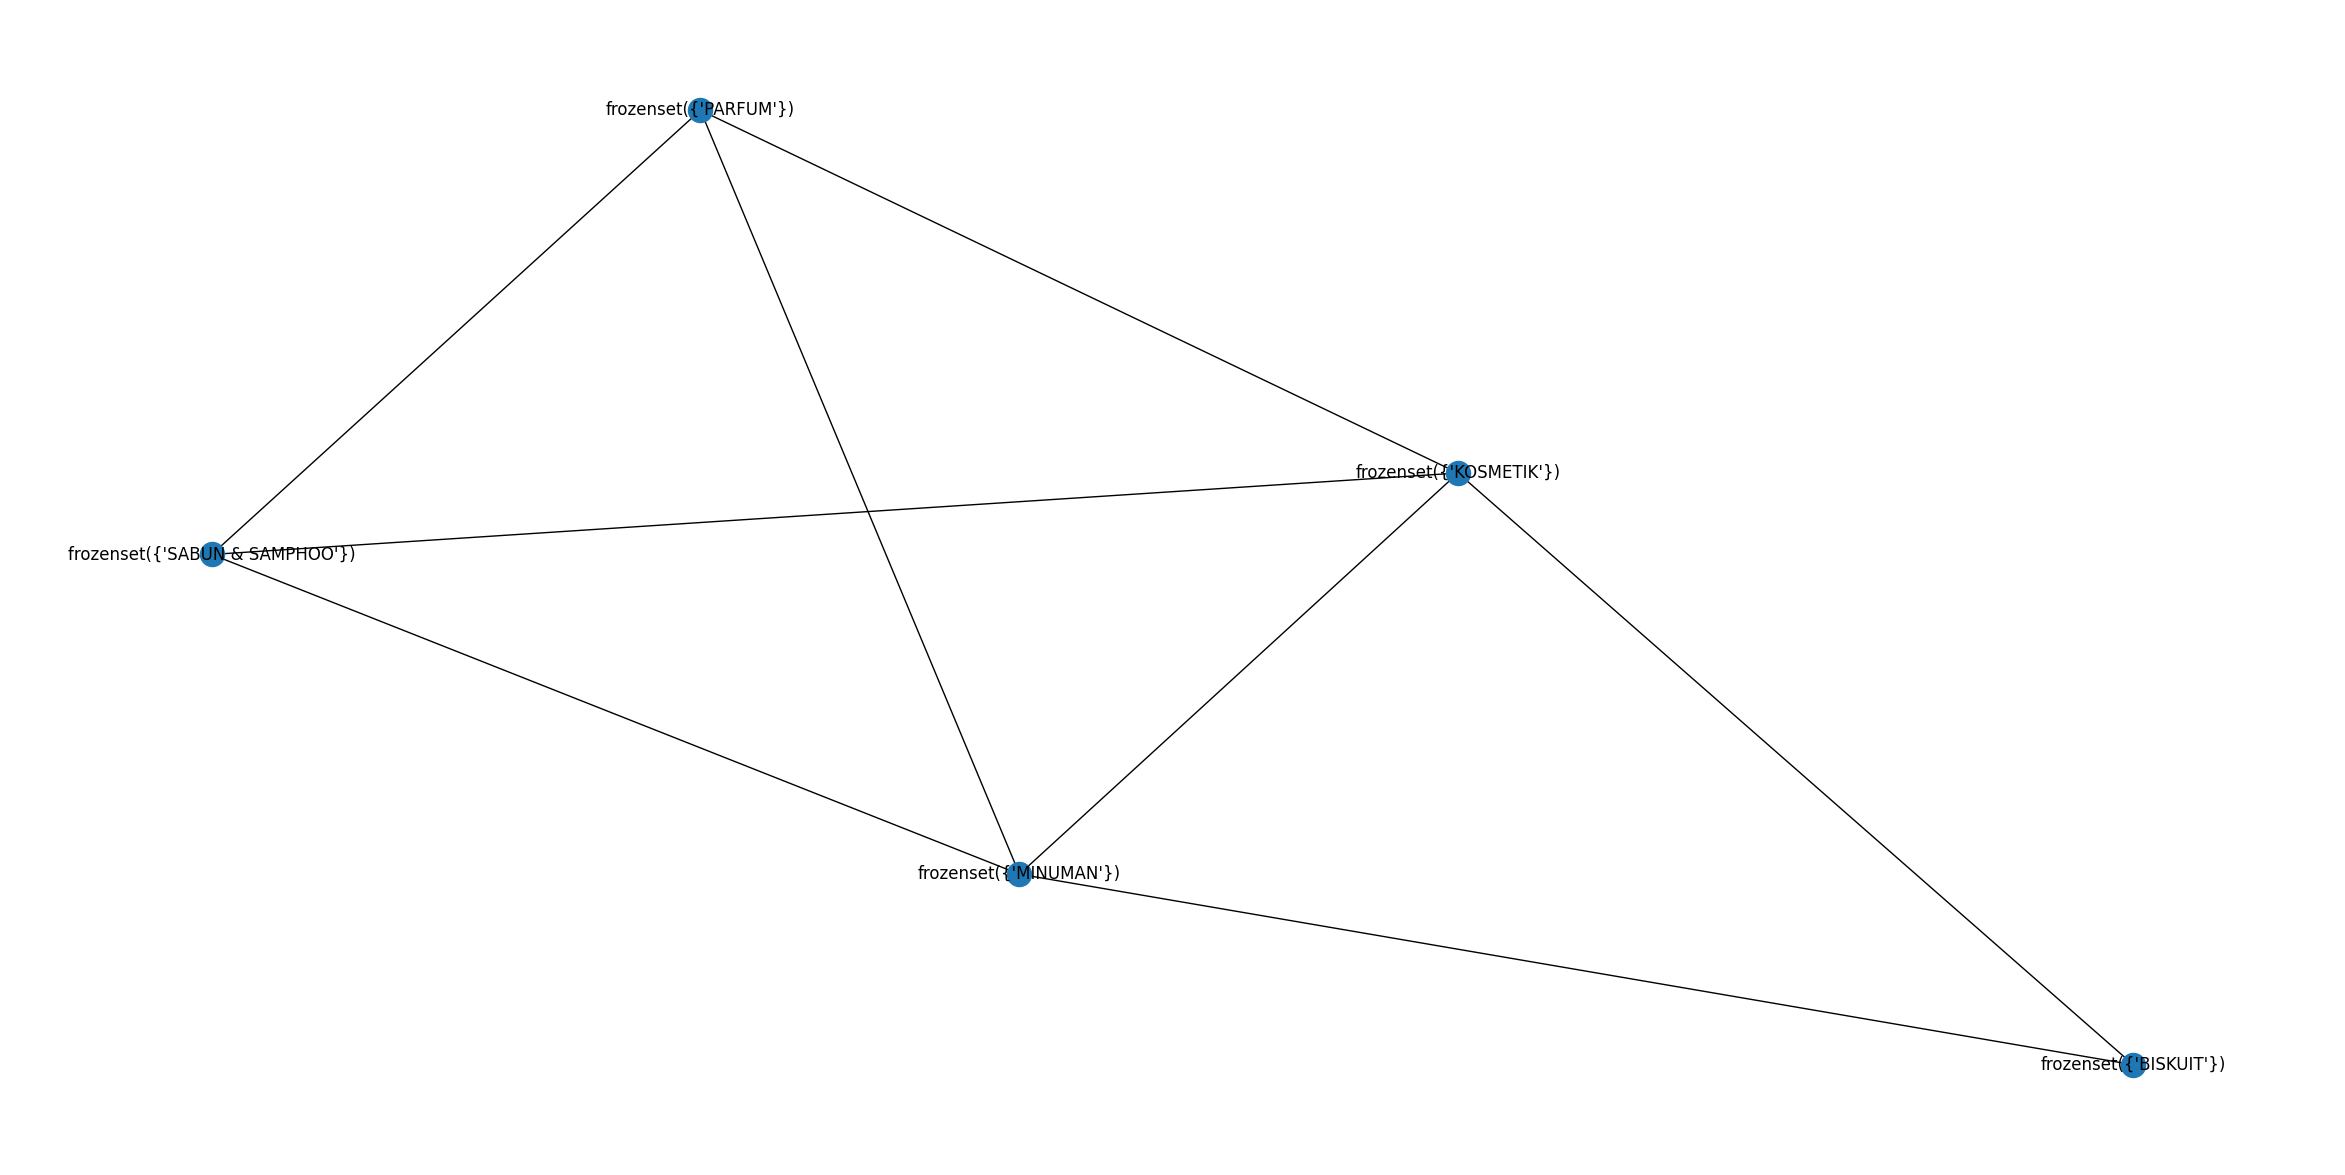

In [30]:
import networkx as nx
fig, ax = plt.subplots(figsize=(30,15))
show = nx.from_pandas_edgelist(top, source='antecedents', target='consequents')
nx.draw(show, with_labels=True)
plt.show()